## Degraded Images:
### Degradation comes in many forms such as motion blur, noise, and camera misfocus.

# Different image restoration techniques
### 1) Inverse filtering: This technique tries to undo the effects of blur by applying a filter that is the inverse of the blur filter.
### 2) Wiener filtering: This technique is similar to inverse filtering, but it takes into account the noise present in the image.
### 3) Constrained least squares: This technique tries to reconstruct an image by solving an optimization problem that takes into account the degradation of the image and the noise present in the image.
### 4) Total variation regularization : This technique uses the total variation of an image to restore it
### 5) Non-local Means filtering: This technique uses a weighted average of the pixels in the image to restore it.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1)Trying Inverse Filtering

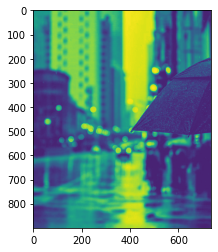

In [46]:
#import image as grayscale 0
img1= cv2.imread('C:\\Users\\Muhammad Zaid\\OneDrive\\Desktop\\bad images/c4240c80d1670617173fa391e8116fe5.jpg',0)

#displaying the image
plt.imshow(img1)

#converting the image to an array
img1= np.float32(img1)

In [47]:
img1

array([[127., 127., 128., ...,  26.,  26.,  26.],
       [127., 128., 128., ...,  26.,  26.,  26.],
       [128., 128., 127., ...,  27.,  27.,  27.],
       ...,
       [ 47.,  47.,  49., ...,  29.,  31.,  31.],
       [ 48.,  48.,  50., ...,  31.,  32.,  32.],
       [ 49.,  49.,  51., ...,  32.,  33.,  33.]], dtype=float32)

In [48]:
#Fourier Transformation of the image
f= np.fft.fft2(img1)
f

array([[ 74650096.               +0.j        ,
        -17896557.61160783 -6254321.34760177j,
          1194702.83802258 -6811744.72756116j, ...,
          -406244.57074933-10022705.7408383j ,
          1194702.83802258 +6811744.72756116j,
        -17896557.61160783 +6254321.34760177j],
       [ 10090734.03608077 -6448848.21646823j,
         -1113009.5381709  -1265076.29703771j,
         -2411610.5728347   -927702.28764587j, ...,
         -4222763.22567757 -1578578.95556256j,
          2840958.12734714 +4366396.40795913j,
           516038.61647782  +184075.15858129j],
       [ -2079506.12962687 -1475256.35378079j,
          -410927.06527935 -1924148.9915947j ,
          -637681.90486153  +368031.11068188j, ...,
           564463.9487872  +1662975.84620956j,
           382176.59065102  -986722.70077628j,
           428551.09007885 -4185696.83505657j],
       ...,
       [  -294080.9239907   +627407.01379707j,
          -241879.5925899    +59860.98408012j,
           -77715.47698763  +1

In [71]:
rows, cols= img1.shape
center= (cols/2, rows/2)

#defining radius
# this value needs to be altered accoring to image
r= 650

#creating a binary image of the same size as the input image, with all pixels set to 0
filter= np.zeros((rows, cols))

for i in range(rows):
    for j in range(cols):
        # IF the distance of the current pixel from the center of the image is less than or equal to the radius 'r'
        if (i-center[1])**2 + (j-center[0])**2 <= r**2:
            #print("true")
            filter[i, j]= 1

In [72]:
#point-wise multiplication
f_filtered= f * filter
f_filtered

array([[ 74650096.               +0.j        ,
        -17896557.61160783 -6254321.34760177j,
          1194702.83802258 -6811744.72756116j, ...,
          -406244.57074933-10022705.7408383j ,
          1194702.83802258 +6811744.72756116j,
        -17896557.61160783 +6254321.34760177j],
       [ 10090734.03608077 -6448848.21646823j,
         -1113009.5381709  -1265076.29703771j,
         -2411610.5728347   -927702.28764587j, ...,
         -4222763.22567757 -1578578.95556256j,
          2840958.12734714 +4366396.40795913j,
           516038.61647782  +184075.15858129j],
       [ -2079506.12962687 -1475256.35378079j,
          -410927.06527935 -1924148.9915947j ,
          -637681.90486153  +368031.11068188j, ...,
           564463.9487872  +1662975.84620956j,
           382176.59065102  -986722.70077628j,
           428551.09007885 -4185696.83505657j],
       ...,
       [  -294080.9239907   +627407.01379707j,
          -241879.5925899    +59860.98408012j,
           -77715.47698763  +1

[[127. 127. 128. ...  26.  26.  26.]
 [127. 128. 128. ...  26.  26.  26.]
 [128. 128. 127. ...  27.  27.  27.]
 ...
 [ 47.  47.  49. ...  29.  31.  31.]
 [ 48.  48.  50. ...  31.  32.  32.]
 [ 49.  49.  51. ...  32.  33.  33.]]


True

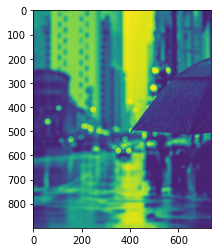

In [73]:
#converting image back
img_filtered= np.fft.ifft2(f_filtered)
img_filtered= np.abs(img_filtered)
print(img_filtered)

img_filtered = np.uint8(img_filtered)
#displaying the image
plt.imshow(img_filtered)

#saving image
cv2.imwrite('C:\\Users\\Muhammad Zaid\\OneDrive\\Desktop\\inverse_filtered_image.jpg', img_filtered)

## 2) Wiener filtering

In [75]:
import scipy.signal

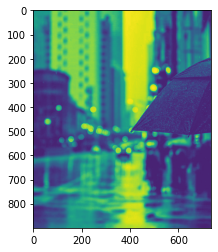

In [76]:
#import image as grayscale 0
img1= cv2.imread('C:\\Users\\Muhammad Zaid\\OneDrive\\Desktop\\bad images/c4240c80d1670617173fa391e8116fe5.jpg',0)

#displaying the image
plt.imshow(img1)

#Fourier Transform of the image
f= np.fft.fft2(img1)

In [78]:
#the power spectrum of the image
PS= np.abs(f)**2
PS

array([[5.57263683e+15, 3.59403310e+14, 4.78271811e+13, ...,
        1.00619665e+14, 4.78271811e+13, 3.59403310e+14],
       [1.43410557e+14, 2.83920827e+12, 6.67649709e+12, ...,
        2.03236408e+13, 2.71364607e+13, 3.00179518e+11],
       [6.50072705e+12, 3.87121039e+12, 5.42085110e+11, ...,
        3.08410821e+12, 1.11968063e+12, 1.77037140e+13],
       ...,
       [4.80123151e+11, 6.20890747e+10, 1.92767195e+10, ...,
        1.31808602e+12, 3.42835327e+12, 9.96964253e+12],
       [6.50072705e+12, 1.77037140e+13, 1.11968063e+12, ...,
        1.63084958e+11, 5.42085110e+11, 3.87121039e+12],
       [1.43410557e+14, 3.00179518e+11, 2.71364607e+13, ...,
        6.25253304e+12, 6.67649709e+12, 2.83920827e+12]])

In [80]:
# Noise level can be calculated by average of the power spectrum, and subtracting it from the average of the original image.
noise_level = np.mean(img1) - np.mean(PS)

#Calculating the the Wiener filter
H = np.conj(f) / (PS + noise_level)

In [83]:
#Multiply the Fourier Transform of the image by the Wiener filter
f_filtered = f * H

#Inverse of the Fourier Transformation to get the filtered image
img_filtered = np.fft.ifft2(f_filtered)

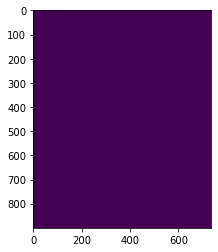

In [86]:
img_filtered = np.abs(img_filtered)
img_filtered = np.uint8(img_filtered)

plt.imshow(img_filtered)

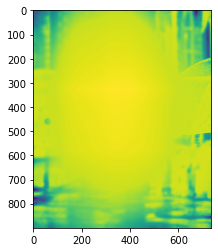

In [103]:
# trying in built function

from scipy.signal import wiener

img= cv2.imread('C:\\Users\\Muhammad Zaid\\OneDrive\\Desktop\\bad images/c4240c80d1670617173fa391e8116fe5.jpg',0)

# Define noise level
noise_level= 650

# Apply Wiener filter
filtered_img = wiener(img, noise_level)
plt.imshow(filtered_img)

In [105]:
cv2.imwrite('C:\\Users\\Muhammad Zaid\\OneDrive\\Desktop\\inverse_filtered_image.jpg', filtered_img)

True